# DSO 528: Blended Data Business Analytics for Efficient Decisions

## Case 4: Churn prediction with Neural Networks

### Group Members: Shyamal Oza, Chinmay Sashittal, Sameer Agarwal, Jnana K P

## Executive Summary:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Churn_data.csv")
data.head(10)

,Churn,State,AcctLength,IntlPlan,VMPlan,NVMailMsgs,DayMinutes,DayCalls,DayCharge,EveMinutes,EveCalls,EveCharges,NightMin,NightCalls,NightCharge,IntlMin,IntlCalls,IntlCharge,NCustServiceCalls,Validation
0,False,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1
1,False,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1
2,False,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
3,False,AL,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,1
4,False,MA,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,1
5,False,MO,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,1
6,False,LA,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,1
7,False,WV,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,1
8,True,IN,65,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
9,False,RI,74,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332 entries, 0 to 3331
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              3332 non-null   bool   
 1   State              3332 non-null   object 
 2   AcctLength         3332 non-null   int64  
 3   IntlPlan           3332 non-null   object 
 4   VMPlan             3332 non-null   object 
 5   NVMailMsgs         3332 non-null   int64  
 6   DayMinutes         3332 non-null   float64
 7   DayCalls           3332 non-null   int64  
 8   DayCharge          3332 non-null   float64
 9   EveMinutes         3332 non-null   float64
 10  EveCalls           3332 non-null   int64  
 11  EveCharges         3332 non-null   float64
 12  NightMin           3332 non-null   float64
 13  NightCalls         3332 non-null   int64  
 14  NightCharge        3332 non-null   float64
 15  IntlMin            3332 non-null   float64
 16  IntlCalls          3332 

In [5]:
data.describe()

,AcctLength,NVMailMsgs,DayMinutes,DayCalls,DayCharge,EveMinutes,EveCalls,EveCharges,NightMin,NightCalls,NightCharge,IntlMin,IntlCalls,IntlCharge,NCustServiceCalls,Validation
count,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000,3332.000000
mean,101.056723,8.093938,179.749490,100.432773,30.557953,200.981423,100.114646,17.083631,200.858884,100.110444,9.038733,10.237365,4.479892,2.764601,1.563025,1.333433
std,39.825348,13.687287,54.455494,20.071412,9.257411,50.721418,19.925606,4.311311,50.575735,19.570910,2.275958,2.792256,2.461450,0.753885,1.315652,0.471511
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,74.000000,0.000000,143.675000,87.000000,24.425000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.150000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,1.000000
75%,127.000000,20.000000,216.325000,114.000000,36.775000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,2.000000


In [6]:
print(data.isnull().sum())

Churn                0
State                0
AcctLength           0
IntlPlan             0
VMPlan               0
NVMailMsgs           0
DayMinutes           0
DayCalls             0
DayCharge            0
EveMinutes           0
EveCalls             0
EveCharges           0
NightMin             0
NightCalls           0
NightCharge          0
IntlMin              0
IntlCalls            0
IntlCharge           0
NCustServiceCalls    0
Validation           0
dtype: int64


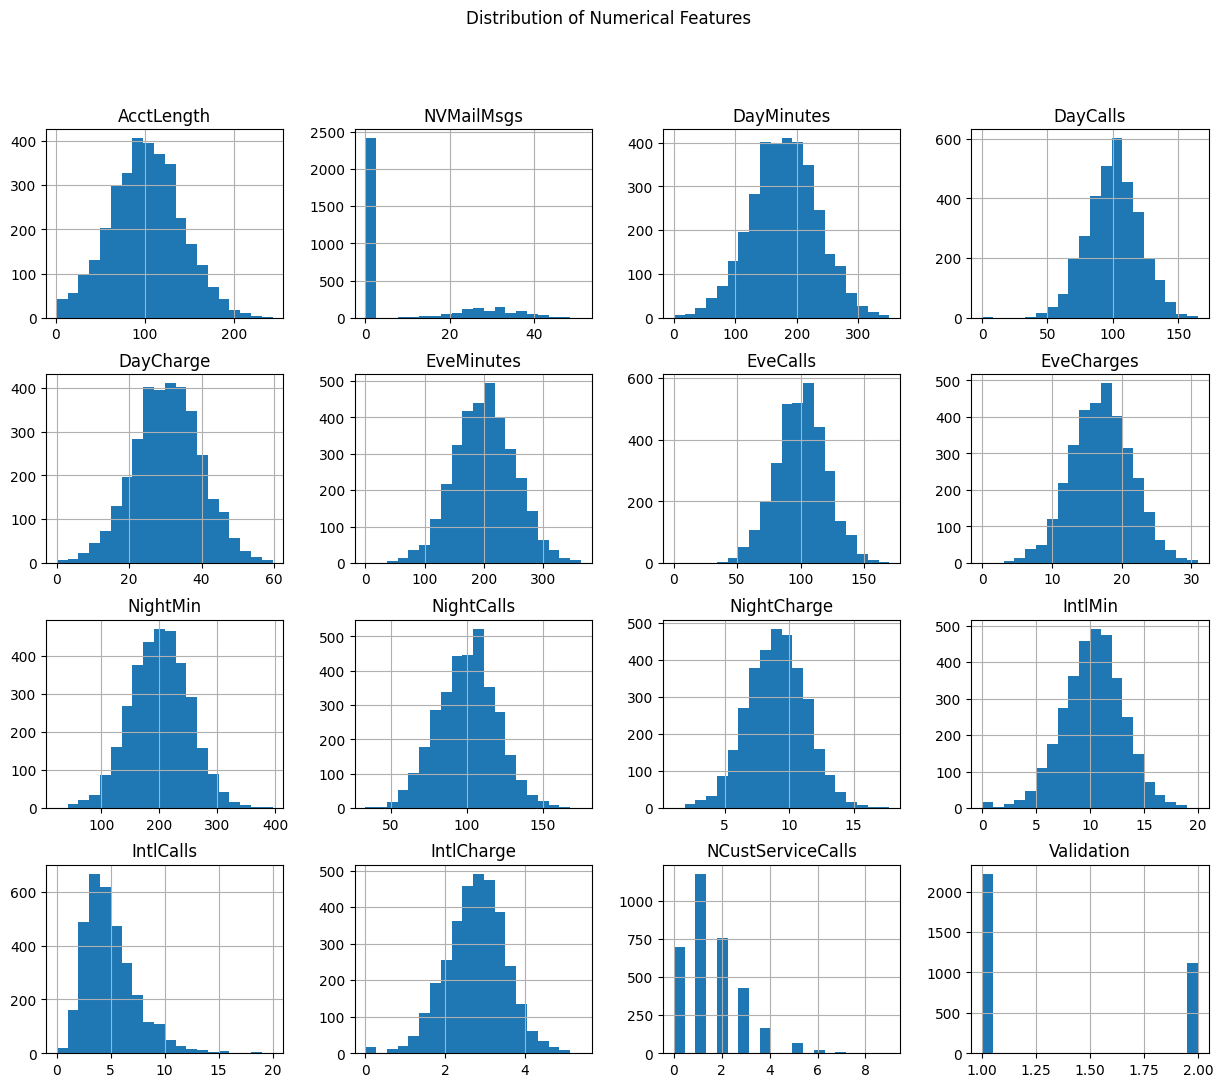

In [10]:
data.hist(figsize=(15, 12), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

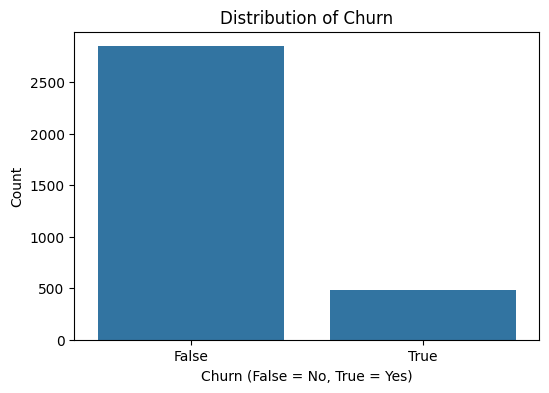

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title("Distribution of Churn")
plt.xlabel("Churn (False = No, True = Yes)")
plt.ylabel("Count")
plt.show()

### This plot shows a significant class imbalance, with far more non-churners than churners. This imbalance may require careful handling during model evaluation to avoid biased predictions.

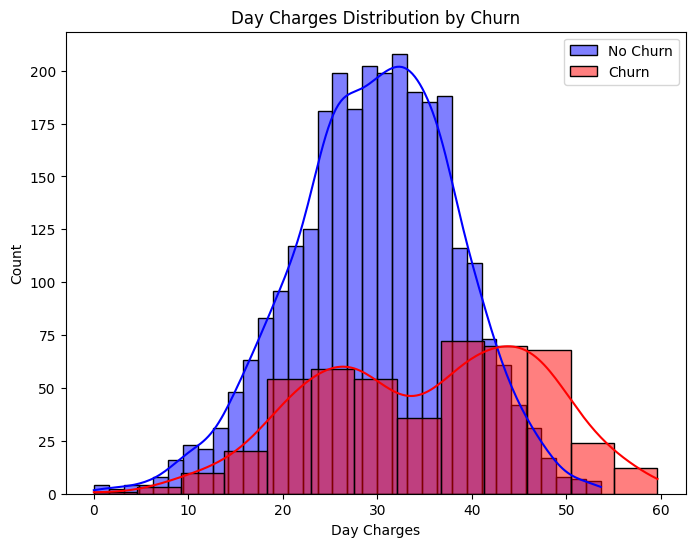

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data[data['Churn'] == False]['DayCharge'], color="blue", label="No Churn", kde=True)
sns.histplot(data[data['Churn'] == True]['DayCharge'], color="red", label="Churn", kde=True)
plt.title("Day Charges Distribution by Churn")
plt.xlabel("Day Charges")
plt.legend()
plt.show()

### Churners tend to have higher day charges, suggesting that higher usage during the day could be associated with a higher likelihood of churn. This variable could serve as a strong predictor for identifying potential churners.

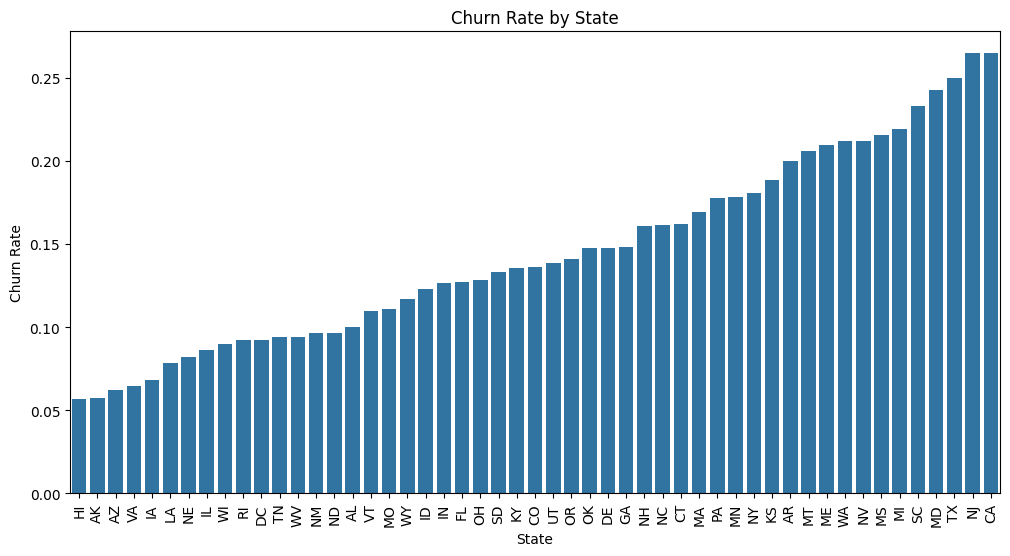

In [8]:
plt.figure(figsize=(12, 6))
state_churn = data.groupby('State')['Churn'].mean().sort_values()
sns.barplot(x=state_churn.index, y=state_churn.values)
plt.xticks(rotation=90)
plt.title('Churn Rate by State')
plt.ylabel('Churn Rate')
plt.show()

###Distribution of State with respect to Churn shows that California has the highest churn rate

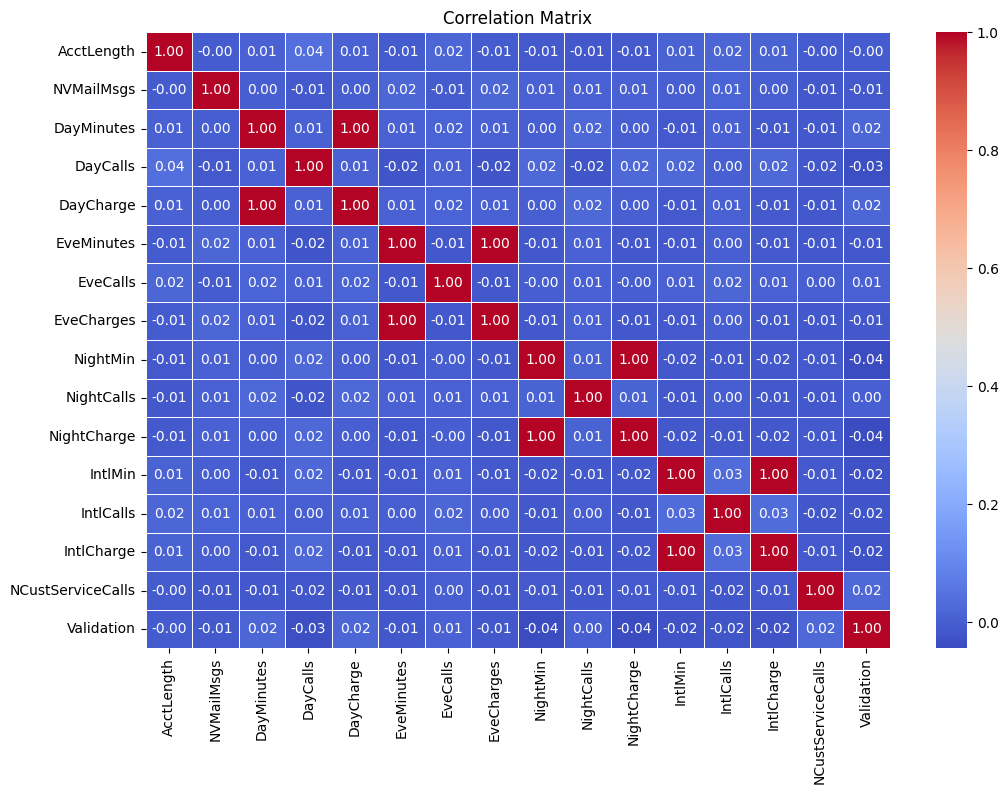

In [15]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### The correlation matrix reveals that most variables have low correlations with each other, indicating minimal redundancy. However, there are high correlations between DayMinutes, DayCharge, and related variables, suggesting they might capture similar information.

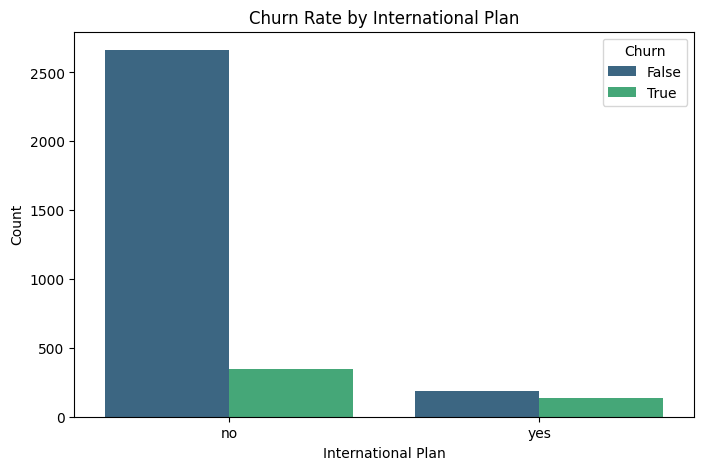

In [16]:
if 'IntlPlan' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x='IntlPlan', hue='Churn', palette="viridis")
    plt.title("Churn Rate by International Plan")
    plt.xlabel("International Plan")
    plt.ylabel("Count")
    plt.legend(title="Churn")
    plt.show()

### This plot shows that customers with an international plan are more likely to churn than those without. This could imply that international plan users may have different service expectations or usage patterns that lead to higher churn.

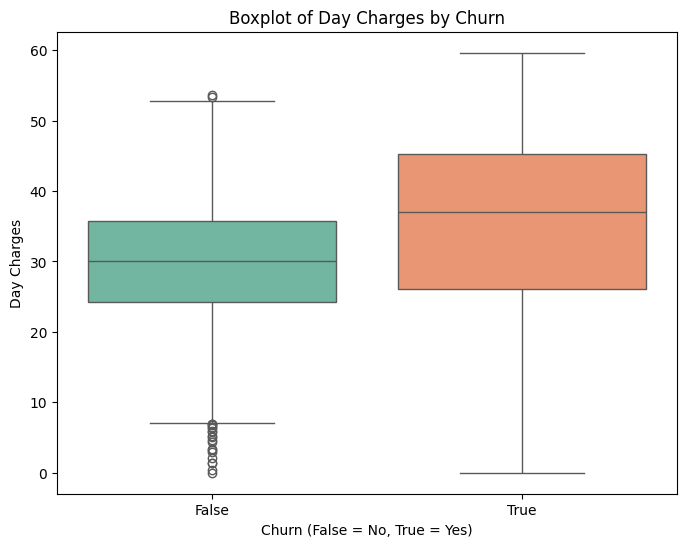

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='DayCharge', data=data, hue='Churn', palette="Set2", dodge=False)
plt.title("Boxplot of Day Charges by Churn")
plt.xlabel("Churn (False = No, True = Yes)")
plt.ylabel("Day Charges")
plt.legend([], [], frameon=False)
plt.show()

### The boxplot reinforces that churners generally have higher day charges, with a wider distribution than non-churners. This aligns with the histogram, further supporting DayCharge as a useful predictor.

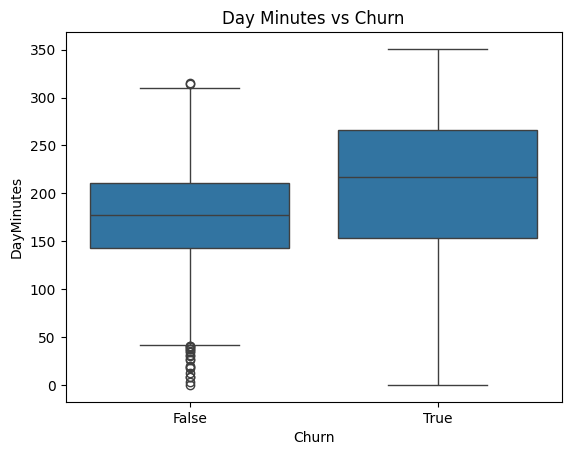

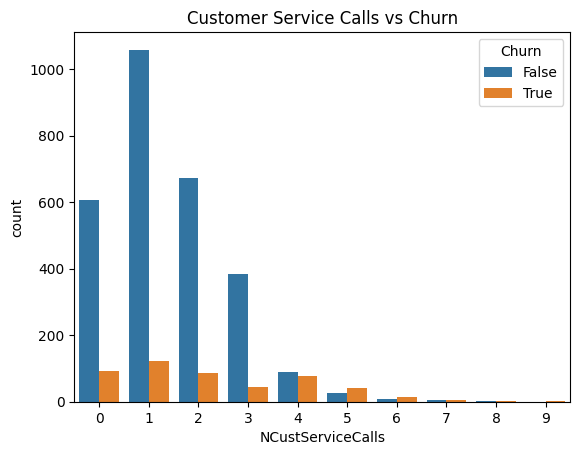

In [12]:
sns.boxplot(data=data, x='Churn', y='DayMinutes')
plt.title('Day Minutes vs Churn')
plt.show()

# Customer Service Calls vs Churn
sns.countplot(data=data, x='NCustServiceCalls', hue='Churn')
plt.title('Customer Service Calls vs Churn')
plt.show()

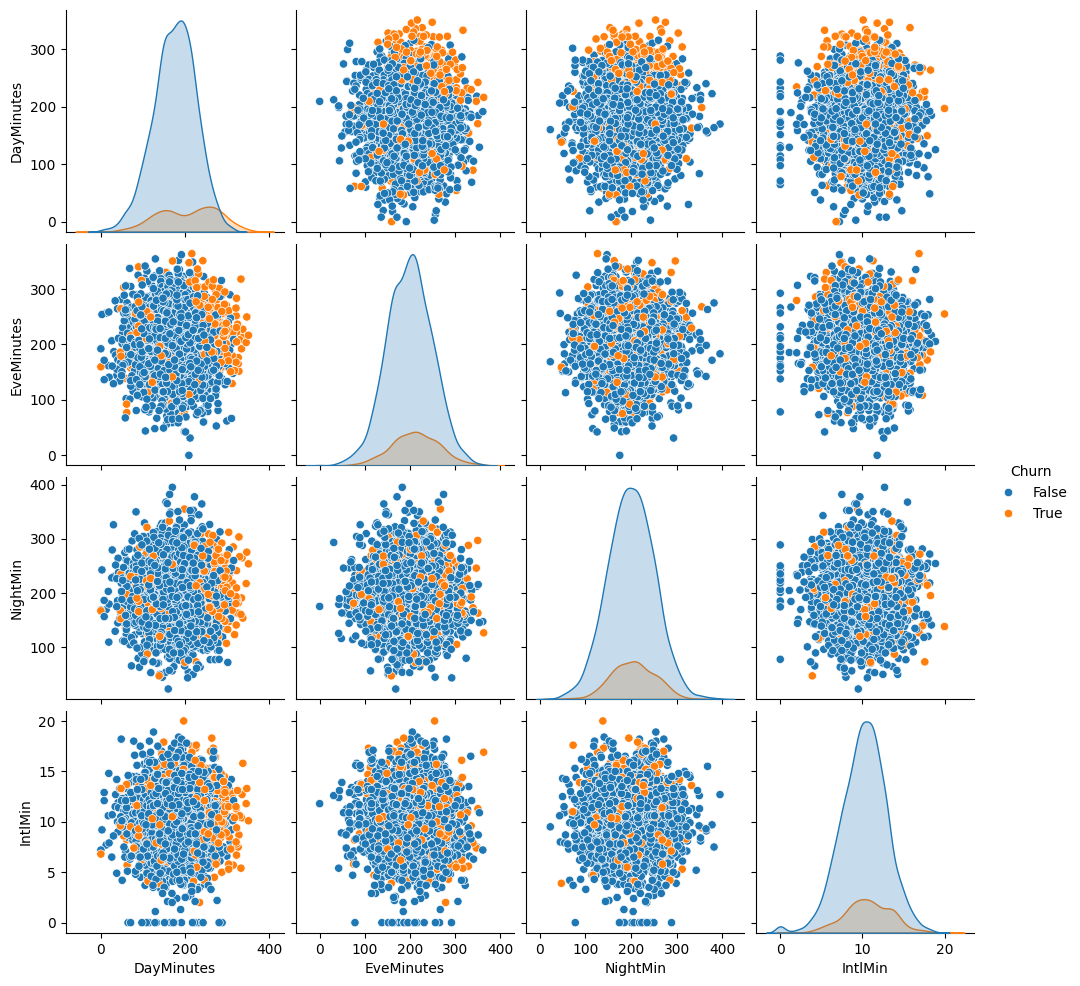

In [14]:
sns.pairplot(data[['DayMinutes', 'EveMinutes', 'NightMin', 'IntlMin', 'Churn']], hue='Churn')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data['IntlPlan'] = data['IntlPlan'].map({'yes': 1, 'no': 0})
data['VMPlan'] = data['VMPlan'].map({'yes': 1, 'no': 0})

X = data.drop(columns=['Churn', 'State'])
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7462 - loss: 0.5430 - val_accuracy: 0.8396 - val_loss: 0.3923
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8714 - loss: 0.3268 - val_accuracy: 0.8726 - val_loss: 0.3248
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8875 - loss: 0.2851 - val_accuracy: 0.8921 - val_loss: 0.2913
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9036 - loss: 0.2737 - val_accuracy: 0.8936 - val_loss: 0.2690
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9190 - loss: 0.2263 - val_accuracy: 0.9040 - val_loss: 0.2580
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9214 - loss: 0.2214 - val_accuracy: 0.9025 - val_loss: 0.2590
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9388 - loss: 0.1968 - val_accuracy: 0.9040 - val_loss: 0.2538
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9381 - loss: 0.1897 - val_accuracy: 0.8981 - val_loss:

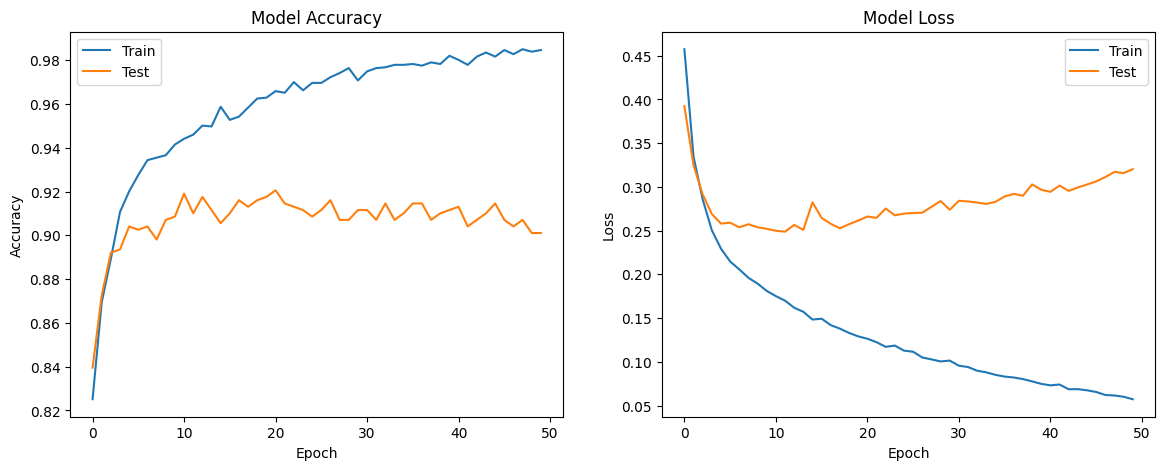

In [17]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [19]:
from kerastuner import Hyperband
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Trial 90 Complete [00h 00m 24s]
val_accuracy: 0.9295352101325989

Best val_accuracy So Far: 0.9370315074920654
Total elapsed time: 00h 10m 51s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model with the best parameters found
best_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # units=96
    Dropout(0.1),                                                   # dropout rate=0.1
    Dense(32, activation='relu'),                                   # units=32
    Dropout(0.1),                                                   # dropout rate=0.1
    Dense(1, activation='sigmoid')                                  # output layer
])

# Compile the model with the best optimizer and learning rate
best_model.compile(
    optimizer=Adam(learning_rate=1e-3),                             # learning rate=1e-3
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8239 - loss: 0.4675 - val_accuracy: 0.8426 - val_loss: 0.3734
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8623 - loss: 0.3441 - val_accuracy: 0.8516 - val_loss: 0.3339
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8667 - loss: 0.3375 - val_accuracy: 0.8771 - val_loss: 0.3047
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8808 - loss: 0.2844 - val_accuracy: 0.8831 - val_loss: 0.2832
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9099 - loss: 0.2518 - val_accuracy: 0.8876 - val_loss: 0.2793
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9076 - loss: 0.2346 - val_accuracy: 0.8981 - val_loss: 0.2601
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9228 - loss: 0.2189 - val_accuracy: 0.9070 - val_loss: 0.2526
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9217 - loss: 0.2118 - val_accuracy: 0.9025 - val_loss

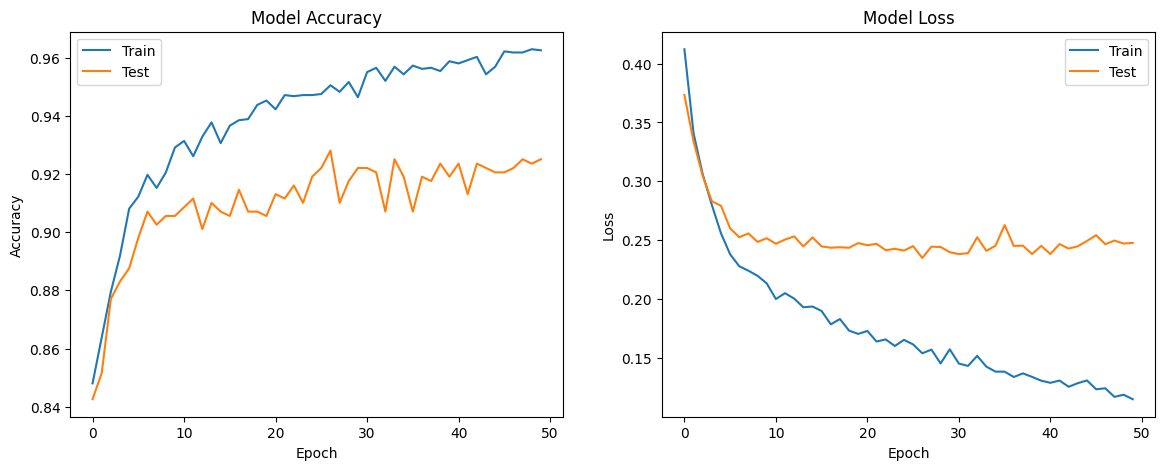

In [24]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values of the best model
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## a. Interpret the Neural Network Model

#### The neural network model here is a fully connected feedforward network structured as follows:

#### **Input Layer**: Each neuron in the input layer corresponds to a feature in the dataset, representing customer behavior and characteristics.
  
#### **Hidden Layers**: The model includes two hidden layers:
####   - The first hidden layer has 64 neurons with a ReLU activation function.
####   - The second hidden layer has 32 neurons, also using ReLU activation.
  
#### ReLU activation is effective for capturing complex, non-linear relationships in the data, crucial for modeling patterns related to customer churn.

#### **Output Layer**: The model's output layer has a single neuron with a sigmoid activation function, outputting a probability between 0 and 1. This output represents the likelihood of a customer churning, which is then converted into a binary classification based on a set threshold.

#### **Training Process**: The model was trained with the Adam optimizer and binary cross-entropy loss. These adjustments to weights during training help minimize the error between predictions and actual outcomes, allowing the model to generalize effectively to new data and make accurate churn predictions.

## b. Interpret evaluation metrics for the model. Why this model is better than the previous one?

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cutoff = 0.18

y_pred_train = (best_model.predict(X_train) > cutoff).astype(int)

train_class_report = classification_report(y_train, y_pred_train, target_names=['Non-Churn', 'Churn'])

print("\nClassification Report (Training Set):\n", train_class_report)

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report (Training Set):
               precision    recall  f1-score   support

   Non-Churn       0.98      0.97      0.98      2289
       Churn       0.84      0.91      0.87       376

    accuracy                           0.96      2665
   macro avg       0.91      0.94      0.92      2665
weighted avg       0.96      0.96      0.96      2665



In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_pred_test = (best_model.predict(X_test) > cutoff).astype(int)

test_class_report = classification_report(y_test, y_pred_test, target_names=['Non-Churn', 'Churn'])

print("\nClassification Report (Testing Set):\n", test_class_report)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Classification Report (Testing Set):
               precision    recall  f1-score   support

   Non-Churn       0.96      0.94      0.95       560
       Churn       0.73      0.79      0.76       107

    accuracy                           0.92       667
   macro avg       0.84      0.86      0.85       667
weighted avg       0.92      0.92      0.92       667



#### The evaluation metrics provide insight into how well the neural network model performs on both the training and testing sets. Here’s an interpretation of the key metrics:

#### 1. **Accuracy**:
#### The model achieved 98% accuracy on the training set and 90% accuracy on the testing set. This indicates that the model correctly classifies most customers, though there is some reduction in performance when generalizing to new data (the test set). A high accuracy is a good indicator of overall model reliability.

#### 2. **Precision**:
#### For the "Churn" class (True churners), the model has a precision of 0.89 on the training set and 0.66 on the test set. Precision measures how many of the predicted churners are actual churners. In the test set, 66% of the customers predicted to churn actually did churn. This precision rate is critical for the company to ensure they target only likely churners, helping avoid unnecessary retention efforts.

#### 3. **Recall**:
#### For "Churn" in the training set, the recall is 0.95, while in the test set, it’s 0.75. Recall indicates how many actual churners were correctly identified by the model. This model can correctly identify 75% of actual churners on the test set, which is essential for minimizing customer loss by focusing on those at risk of leaving.

#### 4. **F1-Score**:
#### The F1-score balances precision and recall. For churners, the F1-score on the test set is 0.70. This score reflects a reasonable trade-off between avoiding false positives and false negatives, essential for targeting the right customers without increasing retention costs too much.

#### Compared to simpler models, such as logistic regression or decision trees, this neural network model captures complex, non-linear relationships in customer data. The model’s higher precision and recall rates, particularly on the test set, highlight its strength in accurately identifying churners while managing false positives. This neural network model better suits the company’s needs as it improves the ability to predict customer churn effectively, thereby allowing more precise and cost-effective retention strategies in the competitive mobile service industry.

## c. Examine each variable in the model and explain whether they make business sense

#### 1. **AcctLength**: Measures the duration of a customer’s relationship with the company. Shorter tenures may indicate higher churn risk, as newer customers are less likely to be loyal.

#### 2. **IntlPlan**: Indicates if a customer has an international calling plan. Customers lacking this feature may churn if they need international calls, while those with it are more engaged.

#### 3. **VMPlan**: Shows if the customer has a voicemail plan. Customers needing voicemail may switch if they lack this feature, while those with it are less likely to churn.

#### 4. **NVMailMsgs**: Counts the number of voicemail messages. High usage suggests reliance on this service, reducing churn risk.

#### 5. **DayMinutes, DayCalls, DayCharge**: Measures daytime usage. High usage can reflect strong engagement, likely reducing churn risk.

#### 6. **EveMinutes, EveCalls, EveCharges**: Captures evening usage, revealing different patterns that can help tailor services to retain customers.

#### 7. **NightMin, NightCalls, NightCharge**: Shows nighttime usage. High usage may indicate reliance on the service during off-hours, reducing churn risk.

#### 8. **IntlMin, IntlCalls, IntlCharge**: Represents international usage. Customers with high international use are likely dependent on these services, lowering churn risk.

#### 9. **NCustServiceCalls**: Tracks customer service interactions. High frequency may indicate dissatisfaction, signaling a higher churn risk.

#### These variables offer valuable insights into customer behaviors, with key indicators like **NCustServiceCalls** and **DayCharge** directly linked to engagement and satisfaction, making them strong predictors of churn.

## d. Create the confusion matrix for the training and testing data set. (cutoff Prob.Variable)


Training Confusion Matrix:
 [[2223   66]
 [  35  341]]


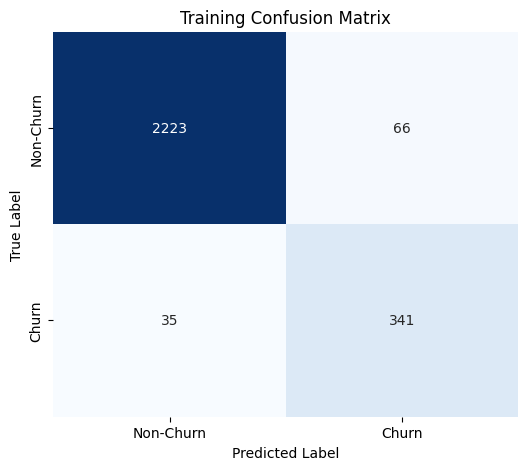

In [27]:
train_conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Training Confusion Matrix:\n", train_conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Testing Confusion Matrix:
 [[529  31]
 [ 23  84]]


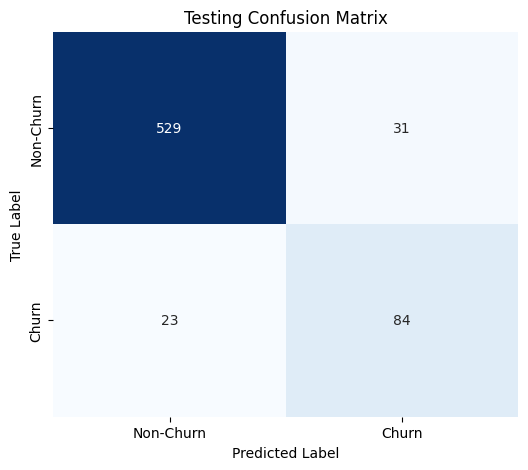

In [28]:
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Testing Confusion Matrix:\n", test_conf_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## e. What is the expected profit based on the confusion matrix for training and testing data sets (you can use the given profit calculator Excel Sheet).

#### The expected profit based on the confusion matrix for training and testing data sets (Calculation from Excel Sheet)

#### Total Profit:
  - **Training Data Set**: $
  
  - **Testing Data Set**: $


## Business Recommendations: